In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import math
import pandas as pd
data=pd.read_csv('FinalPreprocessedData3.csv')
data.drop('Unnamed: 0',inplace=True,axis=1)

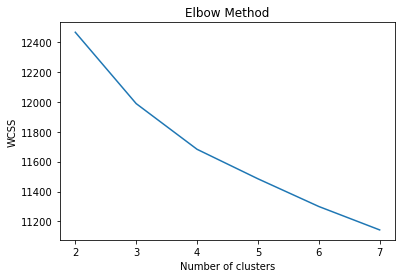

In [26]:
wcss = []
for i in range(2, 8):
  kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

plt.plot(range(2, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

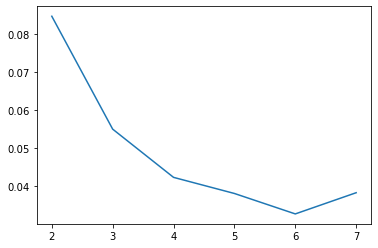

In [27]:


#silhouette score method to find best
from sklearn.metrics import silhouette_score
score=[]
for i in range(2,8):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(data)
    centers = clusterer.cluster_centers_
    score.append(silhouette_score(data, preds))
#     print("For n_clusters = {}, silhouette score is {})".format(i, score))
plt.plot(range(2,8), score)
plt.show()



In [28]:
data.columns

X=data

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.0846565900279031
For n_clusters = 3 The average silhouette_score is : 0.05498035298352333
For n_clusters = 4 The average silhouette_score is : 0.04722367200248019
For n_clusters = 5 The average silhouette_score is : 0.04457029668489915
For n_clusters = 6 The average silhouette_score is : 0.043316885762191205


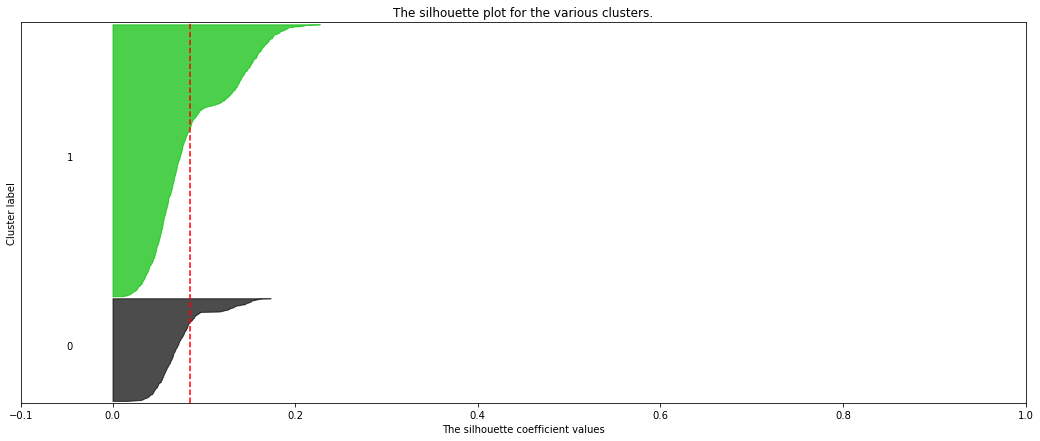

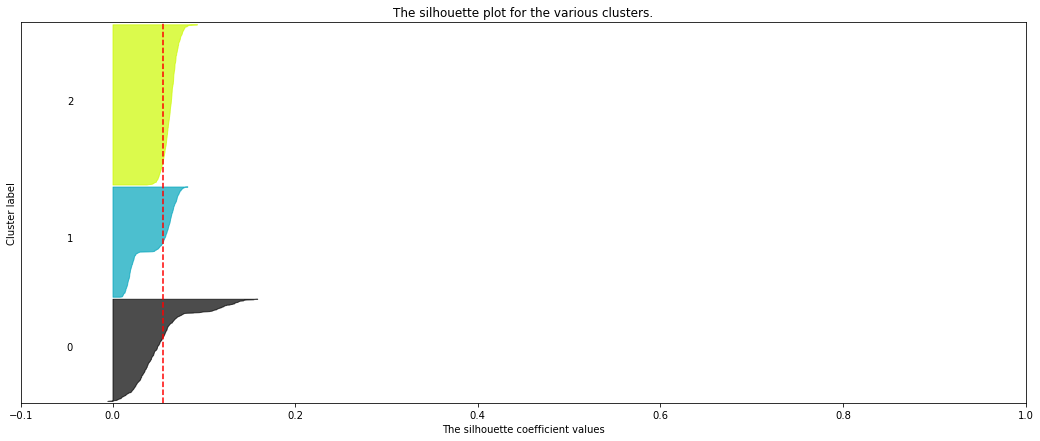

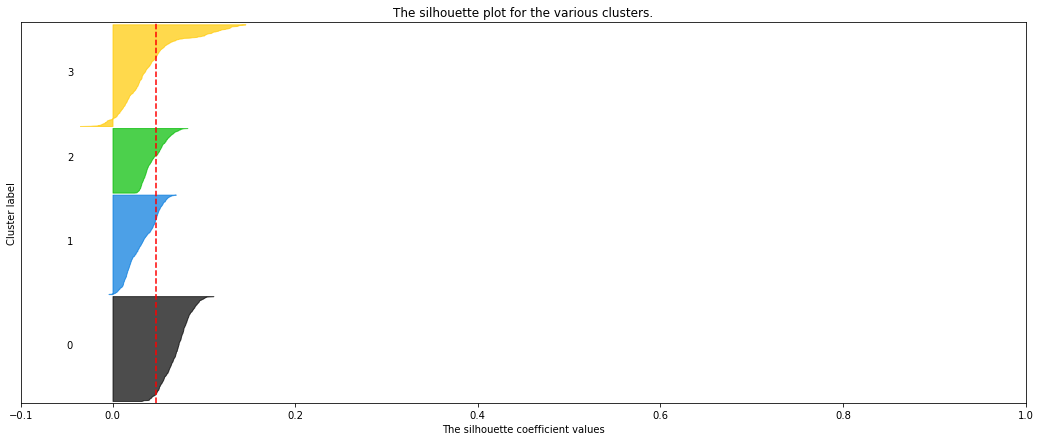

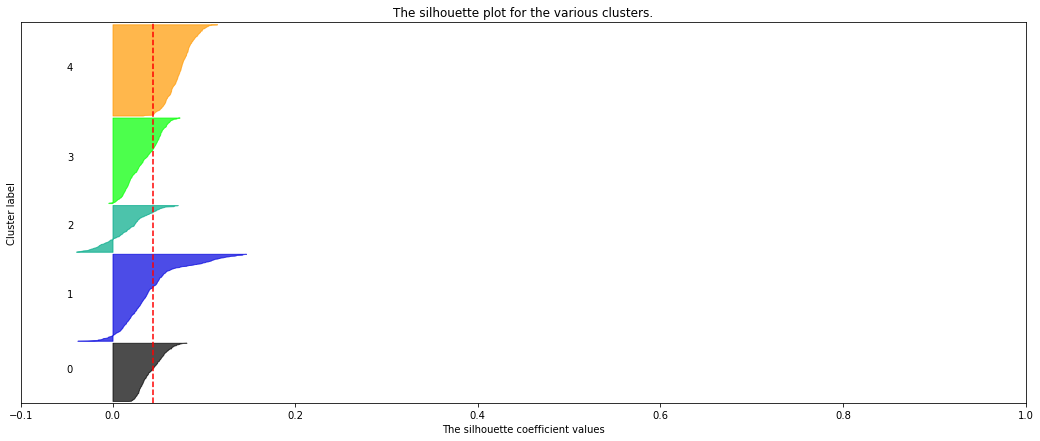

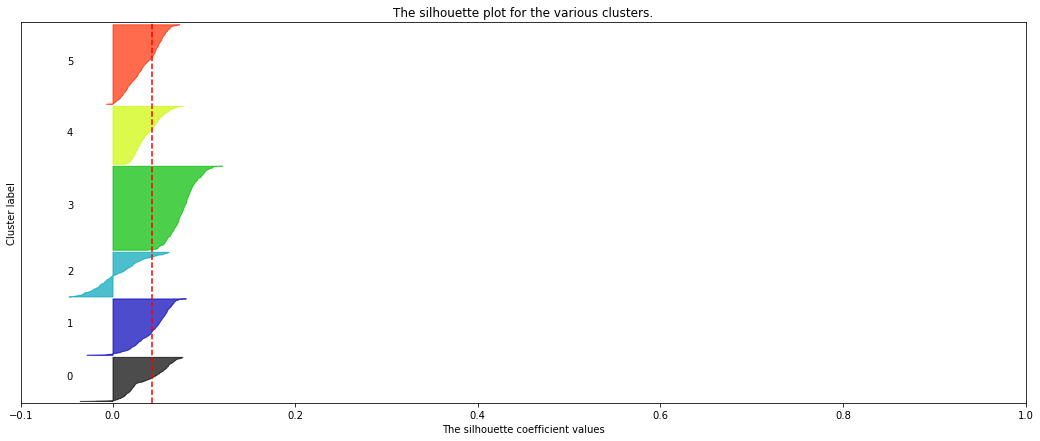

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# # together.
# X, y = make_blobs(n_samples=500,
#                   n_features=2,
#                   centers=4,
#                   cluster_std=1,
#                   center_box=(-10.0, 10.0),
#                   shuffle=True,
#                   random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='random', max_iter=200, n_init=10, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

#     # 2nd Plot showing the actual clusters formed
#     colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
#     ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
#                 c=colors, edgecolor='k')

#     # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

#     ax2.set_title("The visualization of the clustered data.")
#     ax2.set_xlabel("Feature space for the 1st feature")
#     ax2.set_ylabel("Feature space for the 2nd feature")

#     plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
#                   "with n_clusters = %d" % n_clusters),
#                  fontsize=14, fontweight='bold')

plt.show()

# #Slight elbow near 4 and 5 
# #deciding between 4 and 5
# # silhouette scoreof 4 is better than 5 and data leakage is also low for 4 as compared to 5
# #therefore moving a head with 4 clusters

In [30]:
kmeans = KMeans(n_clusters=4, init='random', max_iter=300, n_init=10, random_state=0)
kmeans.fit(data)

KMeans(init='random', n_clusters=4, random_state=0)

In [31]:
len(kmeans.labels_)
print('done')

done


In [32]:
labels=kmeans.labels_
labels

array([2, 0, 3, ..., 1, 1, 3])

In [33]:
data['cluster_labels']=labels
data.columns

Index(['education_level', 'drinks_often', 'drinks_rarely', 'drinks_socially',
       'drugs_sometimes', 'orientation_gay', 'orientation_straight',
       'banking / financial / real estate', 'education / academia',
       'entertainment / media', 'executive / management', 'medicine / health',
       'other_job', 'sales / marketing / biz dev',
       'science / tech / engineering', 'student', 'likes dogs', 'likes cats',
       'has dog', 'has cat', 'dislikes dogs', 'dislike cats',
       'smokes_sometimes', 'smokes_yes', 'athletic', 'fat', 'fit', 'skinny',
       'dropped_out_yes', 'location_same_city', 'location_same_state',
       'single', 'astronomy', 'collectibles', 'cooking', 'dancing', 'food',
       'game_video', 'gardening', 'movies', 'music', 'organising events',
       'outdoor', 'photography', 'politics', 'read/write', 'singing',
       'studying', 'travelling', 'benicia', 'berkeley', 'burlingame',
       'daly city', 'el cerrito', 'emeryville', 'hayward', 'location_other',


In [34]:
data.to_csv('PreprocessedData_withClusterLables.csv')

In [35]:
data['cluster_labels'].value_counts()

0    566
3    549
1    537
2    349
Name: cluster_labels, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
X=data.drop('cluster_labels',axis=1)
y=data['cluster_labels']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [38]:
model.score(X_test,y_test)

0.9983361064891847

In [39]:
pred=model.predict(X_test)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  classification_report,confusion_matrix

In [41]:

confusion_matrix(y_test,pred)

array([[172,   0,   0,   0],
       [  0, 156,   0,   0],
       [  0,   0, 103,   0],
       [  0,   1,   0, 169]], dtype=int64)

In [42]:
pred=model.predict(X_train)
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       394
           1       1.00      1.00      1.00       381
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00       379

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



# HP Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }# Random search of parameters
model_selection= RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the model
model_selection.fit(X_train, y_train)# print results
print(model_selection.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.8min finished


{'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 140}


In [44]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000,max_features='auto',max_depth=140)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=140, n_estimators=1000)

In [45]:
print(model.base_estimator_)

DecisionTreeClassifier()


In [46]:
model.score(X_train,y_train)

1.0

In [47]:
pred=model.predict(X_test)
confusion_matrix(y_test,pred)

array([[172,   0,   0,   0],
       [  0, 156,   0,   0],
       [  0,   0, 103,   0],
       [  0,   0,   0, 170]], dtype=int64)

# Logistic regression

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report,confusion_matrix
X=data.drop('cluster_labels',axis=1)
y=data['cluster_labels']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0,max_iter=200)
model.fit(X_train,y_train)


LogisticRegression(max_iter=200, random_state=0)

In [50]:
model.score(X_train,y_train)

1.0

In [51]:
pred=model.predict(X_test)
print(confusion_matrix(pred,y_test))

[[172   0   0   0]
 [  0 156   0   0]
 [  0   0 103   0]
 [  0   0   0 170]]


# Logistic HP tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV
multi_class=['auto','multinomial']
penalty=['l1','l2']
random_grid = {
 'multi_class': multi_class,
 'penalty': penalty
 }
model=LogisticRegression(max_iter=200)
model_selection= RandomizedSearchCV(estimator = model,param_distributions = random_grid ,n_iter = 200, cv = 10, verbose=2, random_state=42, n_jobs = -1)# Fit the model
model_selection.fit(X_train, y_train)# print results
print(model_selection.best_params_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


C:\Users\akadk\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 4 is smaller than n_iter=200. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  40 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.0s finished


{'penalty': 'l2', 'multi_class': 'auto'}


In [53]:
pred=model_selection.predict(X_test)
print(confusion_matrix(pred,y_test))

[[172   0   0   0]
 [  0 156   0   0]
 [  0   0 103   0]
 [  0   0   0 170]]


In [54]:
import pickle 
logistic_regression_model = "logistic_regression_model.pkl"
with open(logistic_regression_model, 'wb') as file:
    pickle.dump(model_selection, file)


0    0.282857
3    0.274286
1    0.268571
2    0.174286
Name: cluster_labels, dtype: float64

In [131]:


from scipy.sparse import csr_matrix

data_matrix = csr_matrix(data.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(data_matrix)



NearestNeighbors(algorithm='brute', metric='cosine')

In [132]:
distances, indices = model_knn.kneighbors(data.iloc[87,:].values.reshape(1, -1), n_neighbors = 6)

In [133]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(data.index[87]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, data.index[indices.flatten()[i]], distances.flatten()[i]))
        

Recommendations for 87:

1: 1504, with distance of 0.06401184102478608:
2: 1259, with distance of 0.08152412712455848:
3: 1976, with distance of 0.08333390407203656:
4: 842, with distance of 0.0841367555268373:
5: 1192, with distance of 0.08432090937355208:


In [107]:
data.iloc[87,:]

Unnamed: 0                    87.0
education_level                3.0
sex_orientation_f_gay          0.0
sex_orientation_f_straight     0.0
sex_orientation_m_bisexual     0.0
                              ... 
Explore                        0.0
Full of life                   0.0
Fun Partner                    0.0
Knowing each other             1.0
Meeting new people             0.0
Name: 87, Length: 77, dtype: float64